#### Import libraries:

In [37]:
import sys
sys.path.append('../porousmedialab')
from PorousMediaLab import PorousMediaLab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Setting up the properties of time-space and create the domain:

In [38]:
t = 27 / 365
dx = 0.2
L = 40
phi = 0.4
dt = 1e-5
ftc = PorousMediaLab(L, dx, t, dt, phi)

#### To make things interesting lets create not simple inital conditions for iron:

In [39]:
x = np.linspace(0, L, L / dx + 1)
Fe3_init = np.zeros(x.size)
Fe3_init[x > 5] = 75
Fe3_init[x > 15] = 0
Fe3_init[x > 25] = 75
Fe3_init[x > 35] = 0

#### Adding species with names, diffusion coefficients, initial concentrations and boundary top and bottom conditions:

In [40]:
ftc.add_species(is_solute=True, element='O2', D=368, init_C=0, bc_top=0.231, bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='CO2', D=320, init_C=0, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='Fe2', D=127, init_C=0, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_solid_species('OM', 15)
ftc.add_solid_species('FeOH3', Fe3_init)
ftc.add_solute_species('CO2', 320, 0)

#### Specify the constants used in the rates:

In [41]:
ftc.constants['k_OM'] = 1
ftc.constants['Km_O2'] = 20e-3
ftc.constants['Km_FeOH3'] = 10
ftc.constants['k8'] = 1.4e+5
ftc.constants['Q10'] = 4  ### added

### Simulate Temperature with thermal diffusivity coefficient 281000 and init temperature 5C:

In [42]:
ftc.add_temperature(D=281000, init_temperature=5)

#### Add Q10 factor:

In [43]:
ftc.rates['R1'] = 'Q10**((Temperature-5)/10) * k_OM * OM * O2 / (Km_O2 + O2)'
ftc.rates['R2'] = 'Q10**((Temperature-5)/10) * k_OM * OM * FeOH3 / (Km_FeOH3 + FeOH3) * Km_O2 / (Km_O2 + O2)'
ftc.rates['R8'] = 'k8 * O2 * Fe2'

#### ODEs for specific species:

In [44]:
ftc.dcdt['OM'] = '-R1-R2'
ftc.dcdt['O2'] = '-R1-R8'
ftc.dcdt['FeOH3'] = '-4*R2+R8'
ftc.dcdt['Fe2'] = '-R8+4*R2'
ftc.dcdt['CO2'] = 'R1+R2'

#### Solve!:

In [45]:
ftc.solve()

Simulation starts  with following params:
	tend = 0.1,
	dt = 1.00e-05,
	L = 40.0,
	dx = 2.00e-01,
	w = 0.00
Simulation started:
	 2017-06-04 21:17:29


Estimated time of the code execution:
	 0h:00m:24s
Will finish approx.:
	 2017-06-04 21:17:55


### Concentrations of different species during the whole period of simulation:

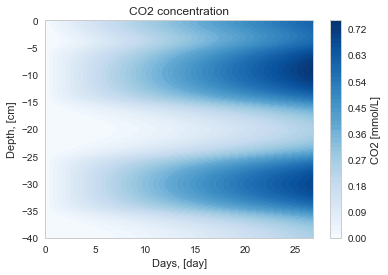

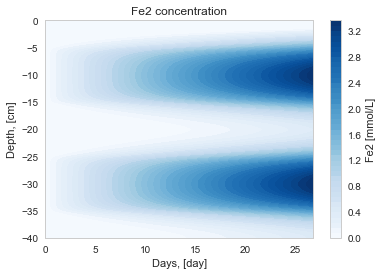

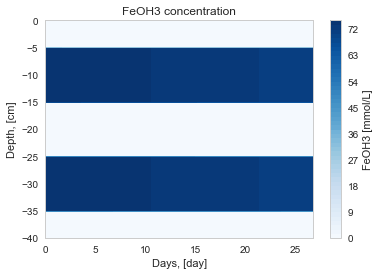

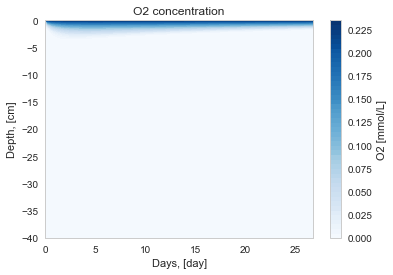

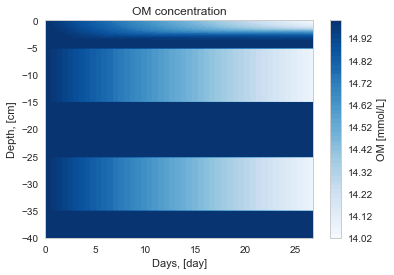

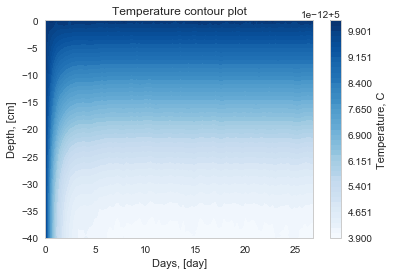

In [46]:
ftc.plot_contourplots()

### The rates of consumption and production of species:

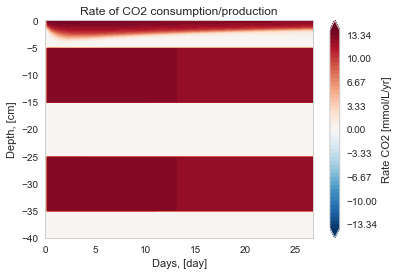

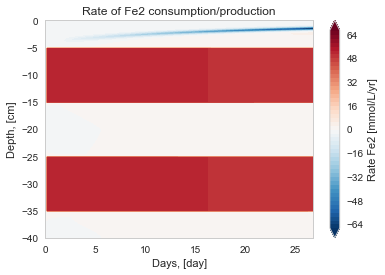

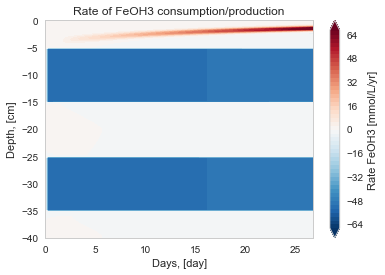

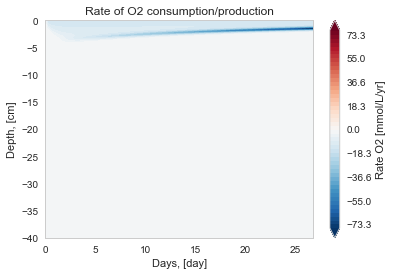

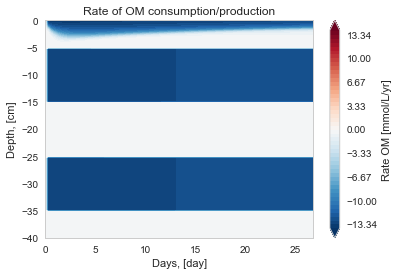

In [47]:
ftc.plot_contourplots_of_rates()

### Profiles at the end of the simulation

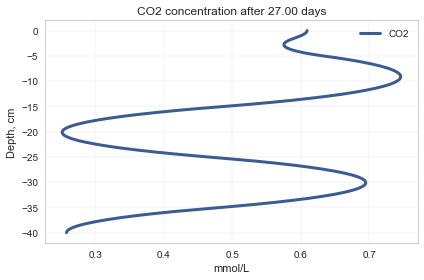

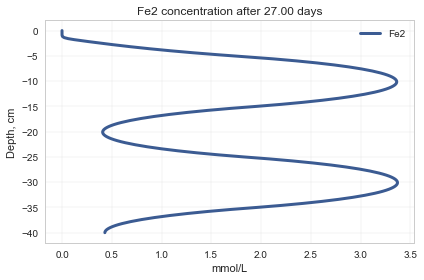

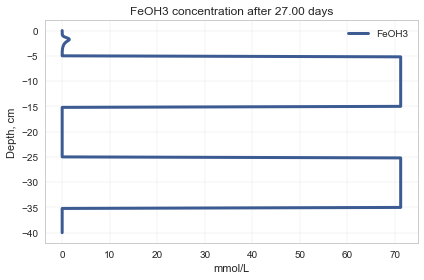

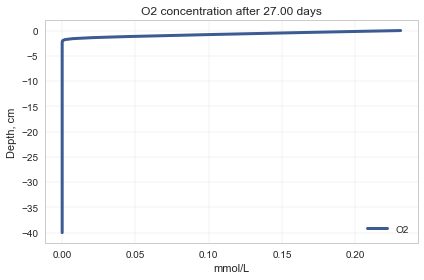

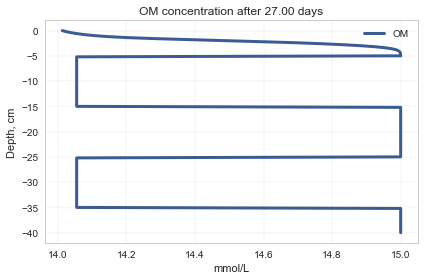

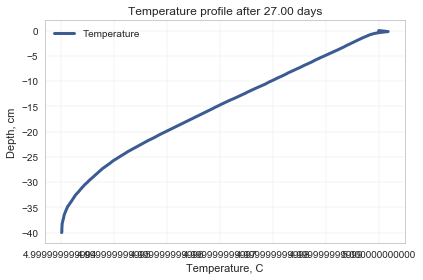

In [48]:
ftc.plot_profiles()